In [10]:


## packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib as mpl
from scipy import stats
import pandas as pd
import pingouin as pg



In [11]:
pathData = '/home/ronaldo/Dados/ProjectUfabc/MouseData/SimulationData/'
pathFln = '/home/ronaldo/github/ProjectUfabc/MouseKennedySNN/Data/Connectome/Kennedy.mat'

trials=150
Seeds=10

In [12]:
### GPDC Total

N=19
Seeds=10

# Gpdc (Downsample 1kHz)
gpdcMatrixTotal=np.zeros((N,N,Seeds)) #(i->j)

for i in range(Seeds):
    data = np.load(pathData+'/Seed'+str(i+1)+'/gpdc.npz')
    gpdcMatrixTotal[:,:,i]=np.max(data['arr_1'],axis=2).T             

In [13]:
### GPDC Total

N=19
Seeds=10

# Gpdc (Downsample 1kHz)
gpdcMatrixPair=np.zeros((N,N,Seeds)) #(i->j)

for i in range(Seeds):
    data = np.load(pathData+'/Seed'+str(i+1)+'/gpdcPairwise.npz')
    gpdcMatrixPair[:,:,i]=np.max(data['arr_1'],axis=2)

#### GPDC vs FLN 

In [14]:
# define figure size
fig=plt.figure(figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')

# mean over all
ArrayReduced=np.zeros((13,150*10))
ArrayPair=np.zeros((13,150*10))
ArrayTotal=np.zeros((13,150*10))

# mean over seed
ArrayReducedSeed=np.zeros((13,150))
ArrayPairSeed=np.zeros((13,150))
ArrayTotalSeed=np.zeros((13,150))

for nAreas in range(3,16):

    gpdcMatrix5=np.zeros((nAreas,nAreas,Seeds))   
    listCorrelationReduced=[]
    listCorrelationPair=[]
    listCorrelationTotal=[]

    idx=0
    for trial in range(trials):
        for seed in range(Seeds):
            
            listFln=[]
            listGpdc=[]
            listGpdcPair=[]
            listGpdcTotal=[]

            data = np.load(pathData+'/Seed'+str(seed+1)+'/NReducedGpdc_'+str(nAreas)+'areas_trial'+str(trial)+'.npz')
            gpdcMatrix5[:,:,seed]=data['arr_0']             

            fln=data['arr_1']   

            for i in range(nAreas):
                for j in range(nAreas):
                    if i!=j:
                        listFln.append(fln[i,j])
                        listGpdc.append(gpdcMatrix5[i,j,seed])

            X = np.array(listFln)
            y = np.array(listGpdc)

            correlation=stats.pearsonr(X,y)[0]

            listCorrelationReduced.append(correlation)


             # GPDC total
            areas=data['arr_2']
            for i in areas:
                for j in areas:
                    if i!=j:
                        listGpdcTotal.append(gpdcMatrixTotal[i,j,seed])
                        listGpdcPair.append(gpdcMatrixPair[i,j,seed])



            y = np.array(listGpdcPair)
            correlation=stats.pearsonr(X,y)[0]
            listCorrelationPair.append(correlation)

            y = np.array(listGpdcTotal)
            correlation=stats.pearsonr(X,y)[0]
            listCorrelationTotal.append(correlation)
            
            ArrayReduced[nAreas-3,idx] = listCorrelationReduced[-1]
            ArrayPair[nAreas-3,idx] = listCorrelationPair[-1]
            ArrayTotal[nAreas-3,idx] = listCorrelationTotal[-1]  
            idx=idx+1
            
        ArrayReducedSeed[nAreas-3,trial] = np.mean(listCorrelationReduced)
        ArrayPairSeed[nAreas-3,trial] = np.mean(listCorrelationPair)
        ArrayTotalSeed[nAreas-3,trial] = np.mean(listCorrelationTotal)
          
        

<Figure size 1200x800 with 0 Axes>

## Stats

In [15]:
# list with p-values
listPvalues=[]
for i in range(0,13):
    listPvalues.append(pg.ttest(ArrayTotal[i,:],ArrayReduced[i,:])['p-val'][0])
    listPvalues.append(pg.ttest(ArrayTotal[i,:],ArrayPair[i,:])['p-val'][0])

# corrected p-values     
pValuesCorrected=pg.multicomp(np.array(listPvalues))    
listPvalues

[3.163590216757743e-07,
 0.03294627587124258,
 0.27553523469958546,
 2.553148276435193e-26,
 0.007271883280933133,
 1.1465538902740939e-74,
 1.783833792648799e-12,
 1.7027921952190541e-192,
 2.199555225281176e-29,
 0.0,
 7.627857572578039e-28,
 0.0,
 1.1264364067428537e-16,
 0.0,
 6.156061669267015e-23,
 0.0,
 5.19256560543668e-26,
 0.0,
 1.7889104731241663e-26,
 0.0,
 2.07958488666039e-53,
 0.0,
 5.112987120117281e-73,
 0.0,
 5.6071018465076025e-61,
 0.0]

In [17]:
# DataFrame
col=['Cluster Size','method A', 'method B', 'p-value uncorrected', 'p-value', 'Different mean']

listToDf=[]
nAreas=2
for i in range(0,26,2):
    nAreas=nAreas+1
    listToDf.append([nAreas,'Total','Cluster',listPvalues[i],pValuesCorrected[1][i],pValuesCorrected[0][i]])
    listToDf.append([nAreas,'Total','Pairwise',listPvalues[i+1],pValuesCorrected[1][i+1],pValuesCorrected[0][i+1]])

# dataframe    
df = pd.DataFrame(listToDf, columns =col) 
dfTemp=df[df['Different mean']==True]   

dfTemp[dfTemp['method B']=='Cluster']

,Cluster Size,method A,method B,p-value uncorrected,p-value,Different mean
0,3,Total,Cluster,3.163590e-07,1.265436e-06,True
4,5,Total,Cluster,7.271883e-03,2.181565e-02,True
6,6,Total,Cluster,1.783834e-12,8.919169e-12,True
8,7,Total,Cluster,2.199555e-29,2.639466e-28,True
10,8,Total,Cluster,7.627858e-28,8.390643e-27,True
12,9,Total,Cluster,1.126436e-16,6.758618e-16,True
14,10,Total,Cluster,6.156062e-23,4.309243e-22,True
16,11,Total,Cluster,5.192566e-26,4.154052e-25,True
18,12,Total,Cluster,1.788910e-26,1.788910e-25,True
20,13,Total,Cluster,2.079585e-53,2.703460e-52,True


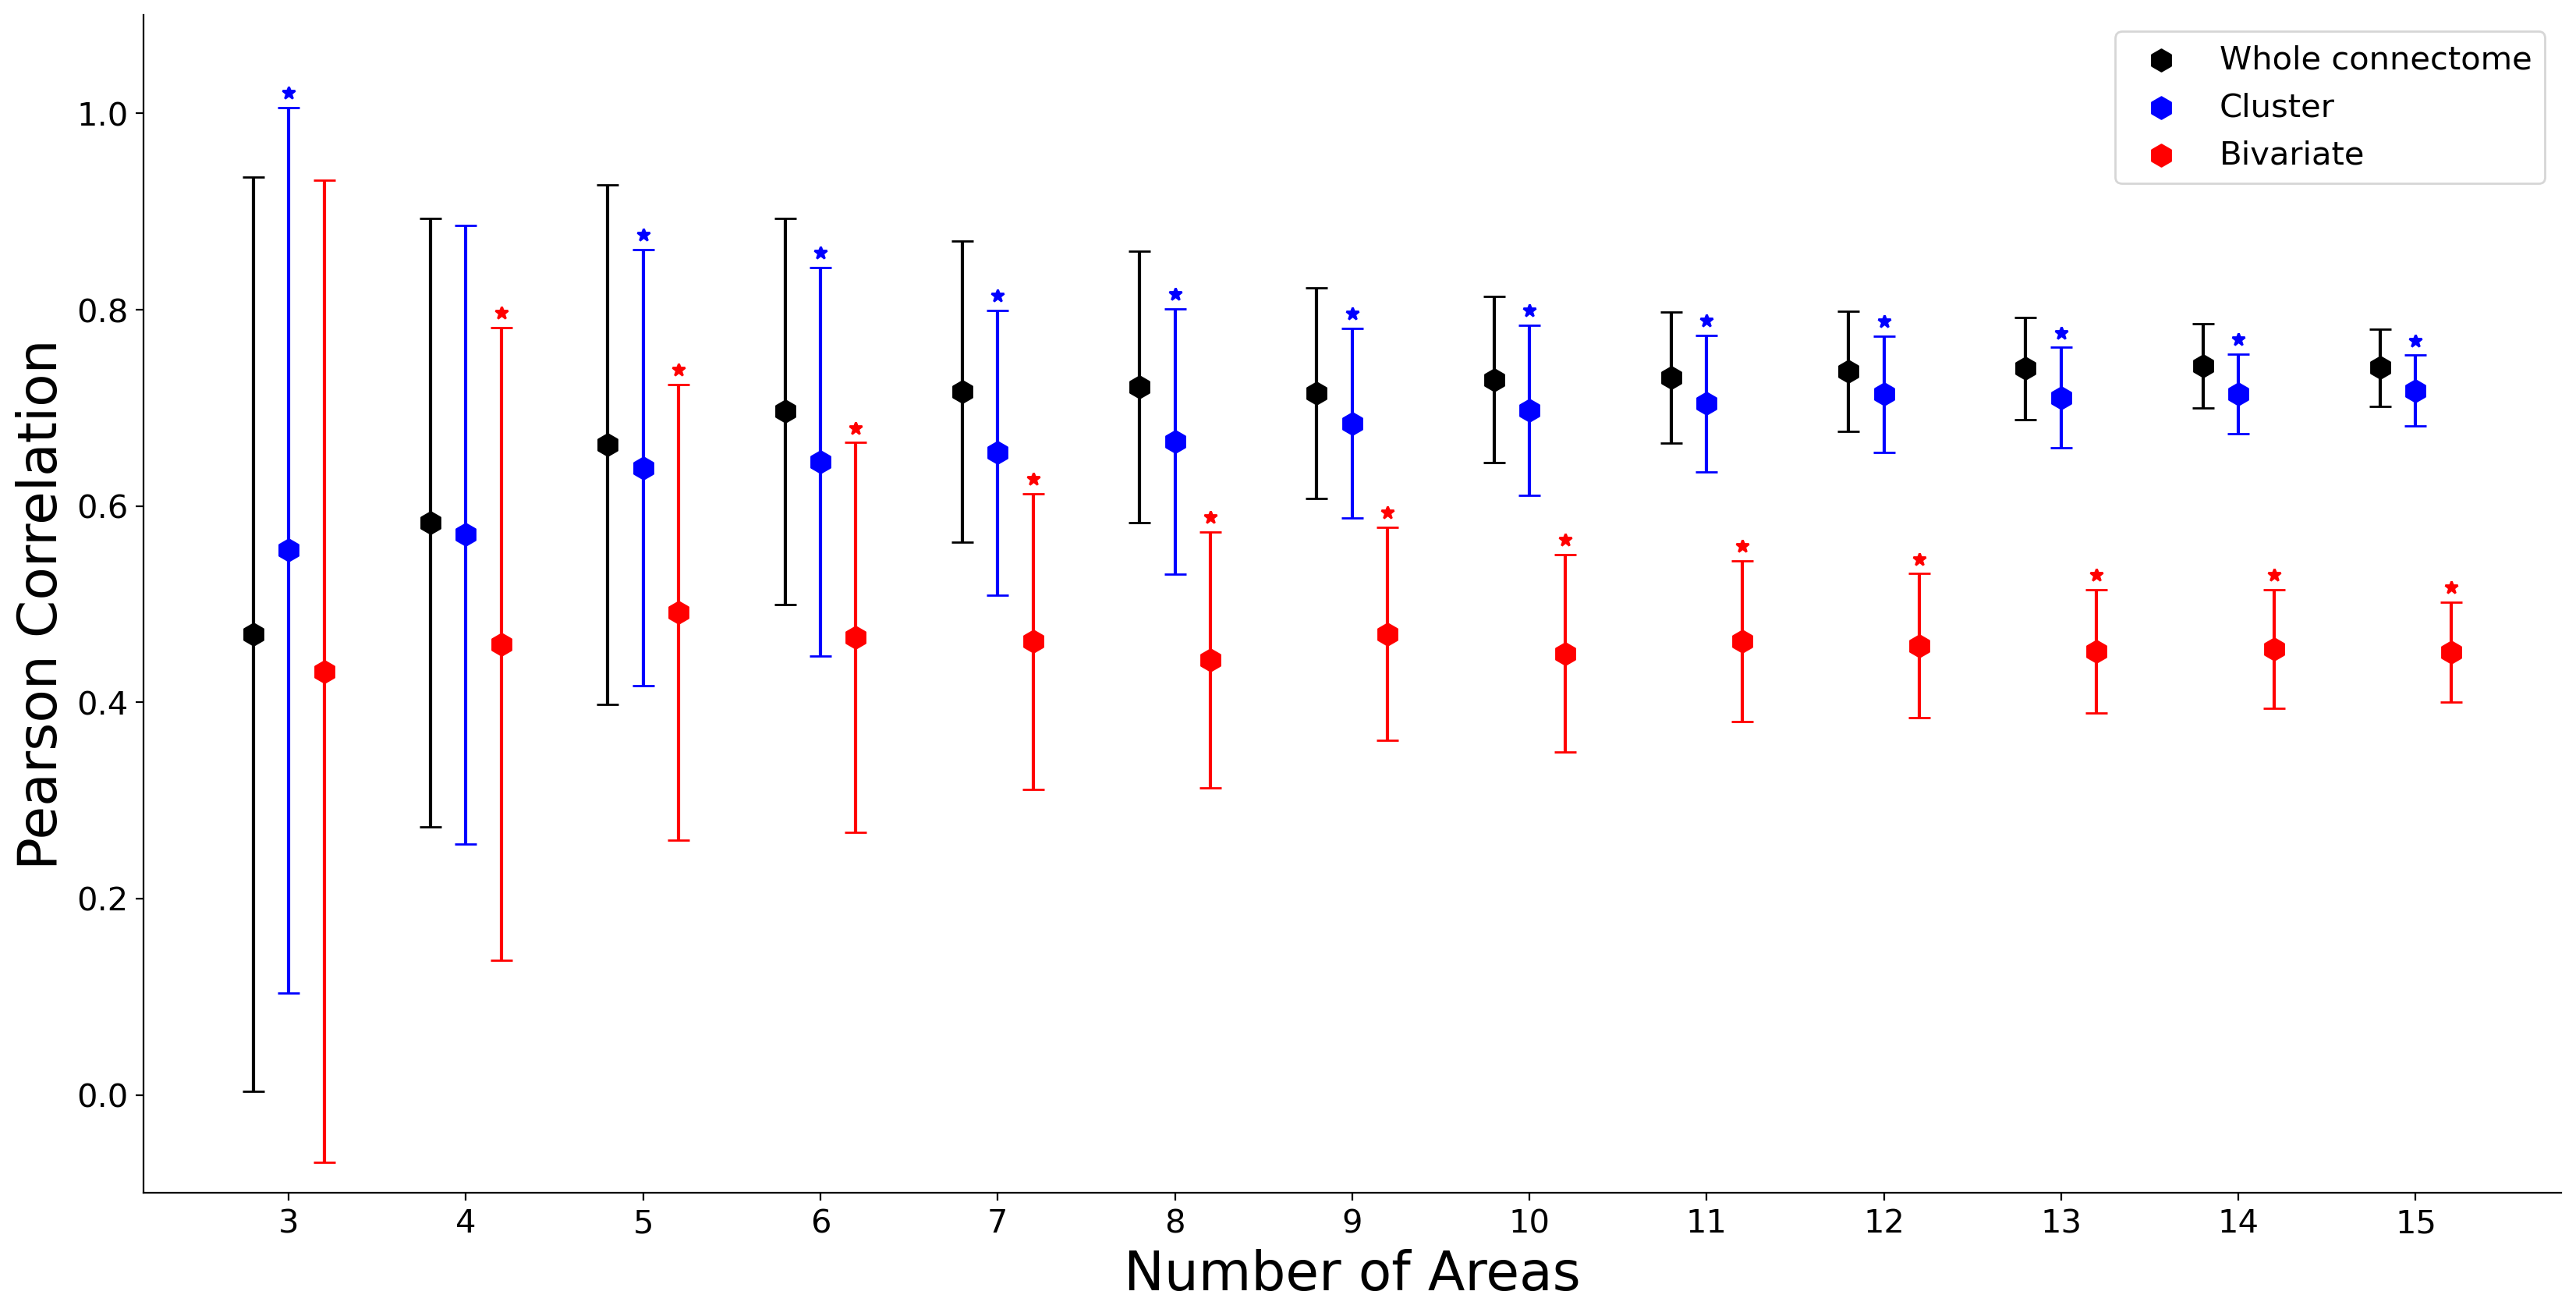

In [8]:


listAreas=range(3,16)
meanTotal=np.mean(ArrayTotal,axis=1)
meanCluster=np.mean(ArrayReduced,axis=1)
meanPair=np.mean(ArrayPair,axis=1)
stdTotal=np.std(ArrayTotal,axis=1)
stdCluster=np.std(ArrayReduced,axis=1)
stdPair=np.std(ArrayPair,axis=1)


fig=plt.figure(figsize=(20,10), dpi= 200, facecolor='w', edgecolor='k')

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.rcParams.update({'lines.markeredgewidth': 1})
plt.rcParams.update({'font.size': 15})


plt.errorbar(np.array(listAreas)-0.2, meanTotal, yerr=stdTotal, fmt='ko',capsize=5);
plt.scatter(np.array(listAreas)-0.2, meanTotal, s = 100, marker = "h", color = "k")

plt.errorbar(np.array(listAreas), meanCluster, yerr=stdCluster, fmt='bo',capsize=5);
plt.scatter(np.array(listAreas), meanCluster, s = 100, marker = "h", color = "b")


plt.errorbar(np.array(listAreas)+0.2, meanPair, yerr=stdPair, fmt='ro',capsize=5);
plt.scatter(np.array(listAreas)+0.2, meanPair, s = 100, marker = "h", color = "r")

plt.xlabel('Number of Areas',fontsize=25)
plt.ylabel('Pearson Correlation',fontsize=25)
plt.ylim([-0.1,1.1])
plt.xticks([3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.legend(['Whole connectome','Cluster','Bivariate'])


### Significance
sumTotalCluster=meanCluster+stdCluster
sumTotalPair=meanPair+stdPair
plt.plot(np.array([3,5,6,7,8,9,10,11,12,13,14,15]),sumTotalCluster[[0,2,3,4,5,6,7,8,9,10,11,12]]+0.015,'b*')
plt.plot(np.array([4,5,6,7,8,9,10,11,12,13,14,15])+0.2,sumTotalPair[1:]+0.015,'r*')

plt.savefig('figure5.svg')